# overview

we will learn  ways to evaluate binary classification models
things we are looking at:
- accuracy
- types of errorsand correct decisions with the confusion table
- precision and recall
- ROC curves
- cross valiation 




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('data/churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [10]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [11]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

# 4.1 Accuracy and dummy model

- we will evaluate the model on different thresholds
- we will also check the accuracy of the dummy baselines
- we will answer the question of whether 80.3% is good

- accuracy tells us the fraction of correct predictions over the base value.
- basically the number of correct predictions / all predictions

Currently the dicision threshold is 0.5, but it is possible to change this other numbers which may affect accuracy

In [17]:
#we make some thresholds that we can test on
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
        churn_decision = (y_pred >= t)
        score = (y_val == churn_decision).mean()
        print(f"{t.round(2)}, {score.round(2)}")
        scores.append(score)

0.0, 0.27
0.05, 0.51
0.1, 0.61
0.15, 0.66
0.2, 0.7
0.25, 0.73
0.3, 0.76
0.35, 0.77
0.4, 0.78
0.45, 0.79
0.5, 0.8
0.55, 0.8
0.6, 0.8
0.65, 0.79
0.7, 0.77
0.75, 0.74
0.8, 0.73
0.85, 0.73
0.9, 0.73
0.95, 0.73
1.0, 0.73


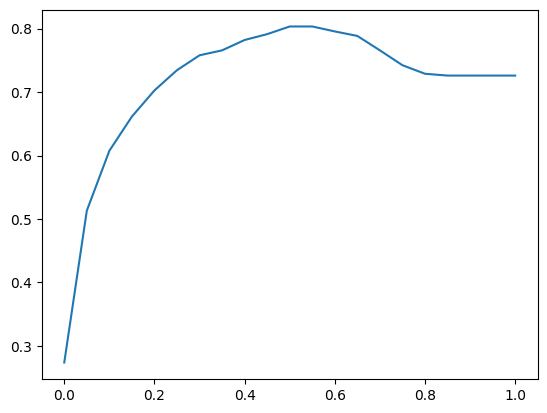

In [ ]:
# lets look at the results
# we can see that 0.4 is the best threshold
plt.plot(thresholds, scores)

In [ ]:
# there is actually already a way to do this in sklearn

from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred>=0.5)

0.8034066713981547

In [23]:
# now lets do the loop

thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
        score = accuracy_score(y_val, y_pred >=  t)
        scores.append(score)

what is interesting is the first and last. These are extere examples but why are the numbers so good?

go to 7.35

